In [ ]:
datascience/Fraud.csv # file location 

In [3]:
import pandas as pd

df = pd.read_csv('datascience/Fraud.csv')  # Replace with your file name
print(df.shape)  # Check the dimensions
df.head()  # Display the first few rows


(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# Get an overview of data types and missing values
df.info()

# Summary statistics for numerical columns
df.describe()

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
Missing values in each column:
Series([], dtype: int64)


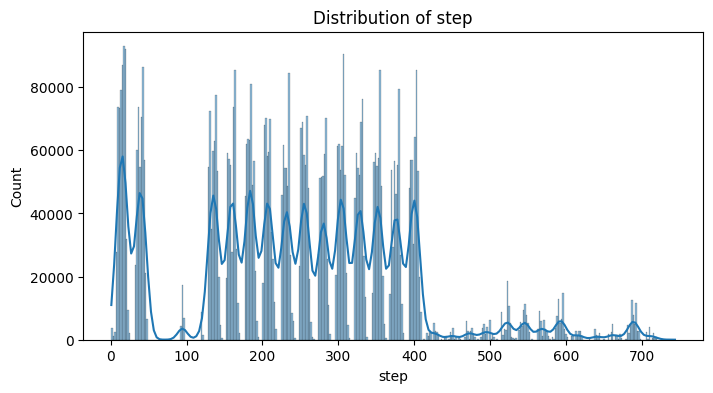

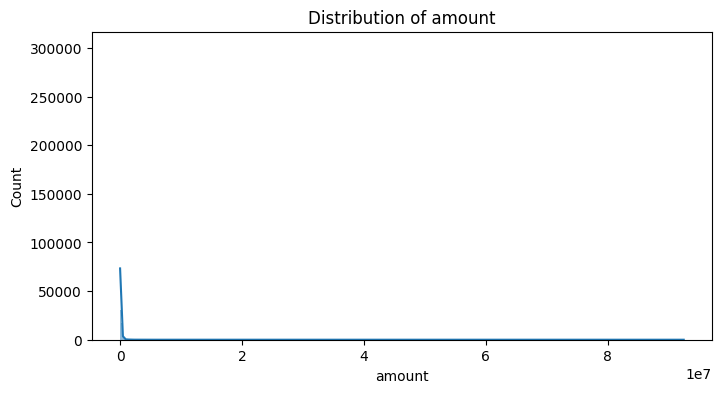

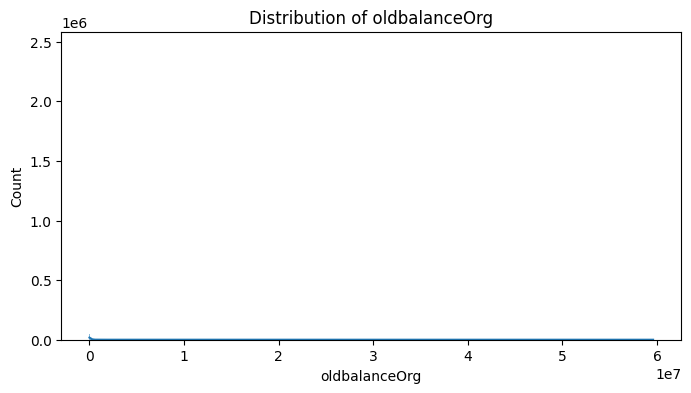

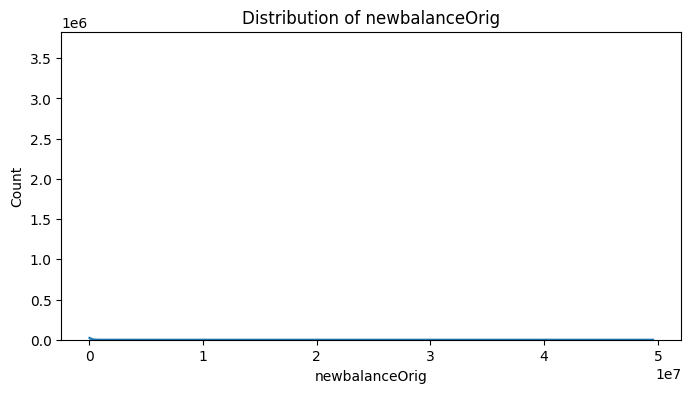

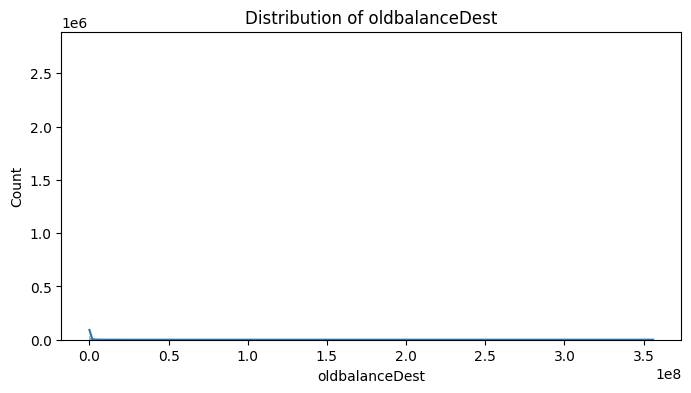

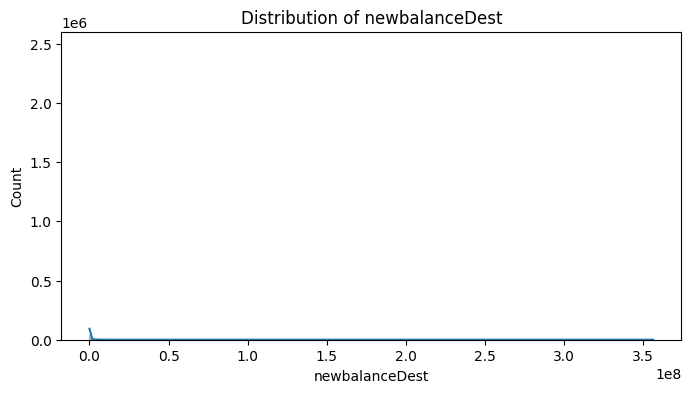

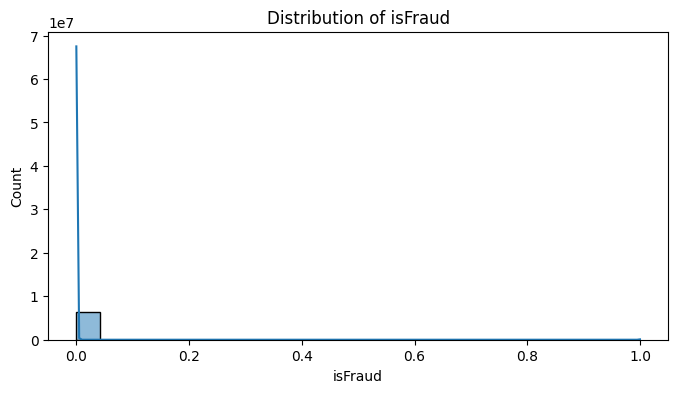

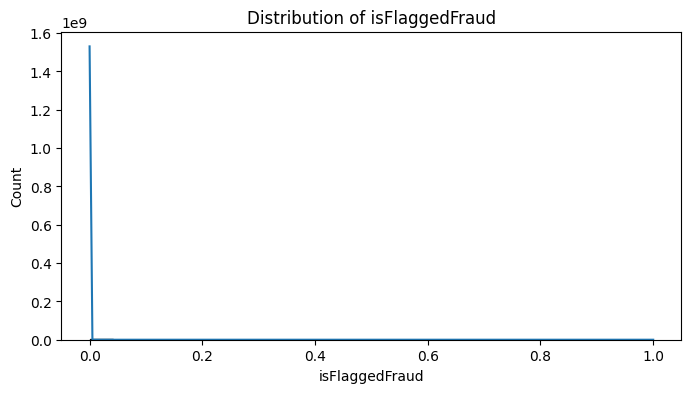

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


isFraud
0    6354407
1       8213
Name: count, dtype: int64


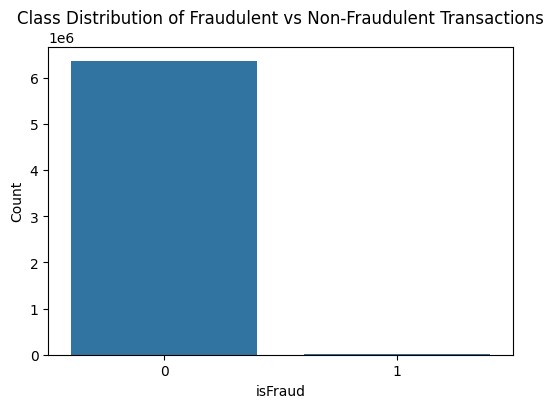

In [10]:
# Check unique values in the target column
print(df['isFraud'].value_counts())

# Visualize the class distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()


In [ ]:
### Data Cleaning 

In [12]:
# Fill missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify if there are any remaining missing values
print("Remaining missing values:")
print(df.isnull().sum().sum())  # Should be 0 if all missing values are handled


C:\Users\SHAMEER.K\AppData\Local\Temp\ipykernel_21692\2360943075.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Remaining missing values:
0


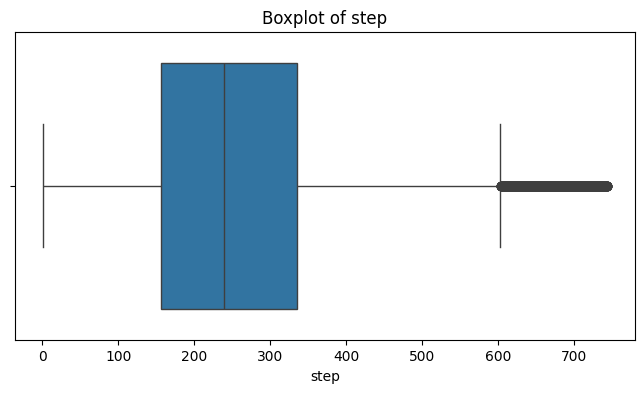

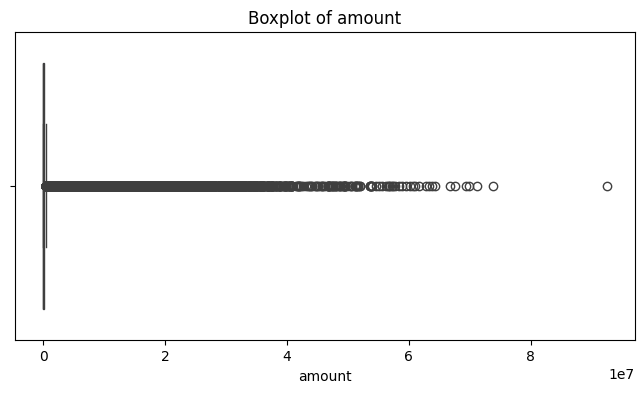

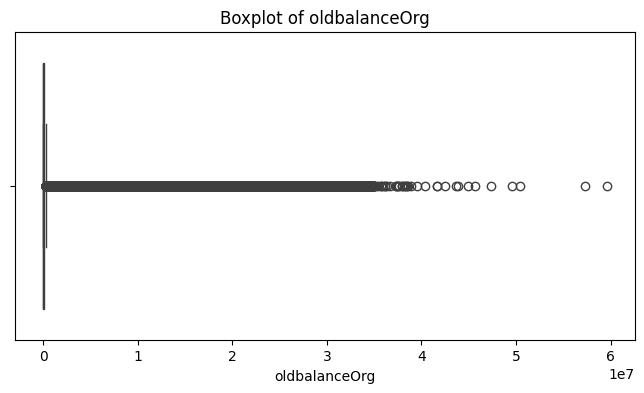

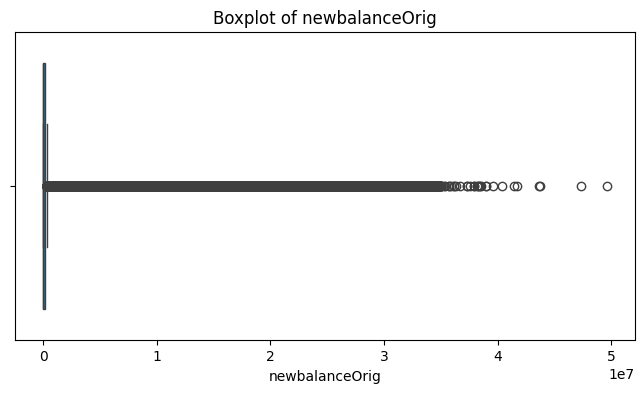

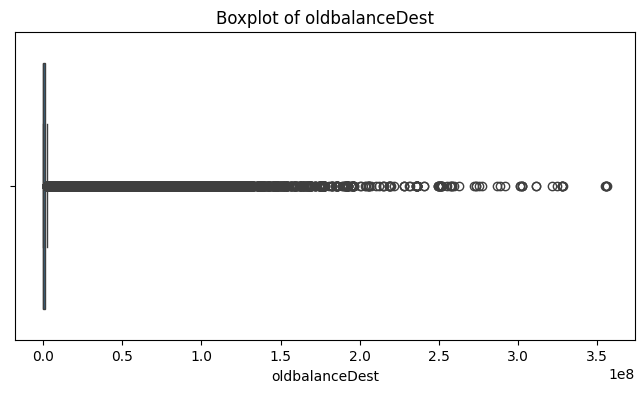

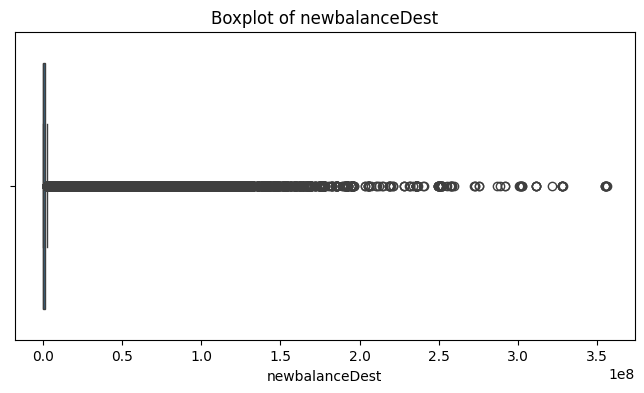

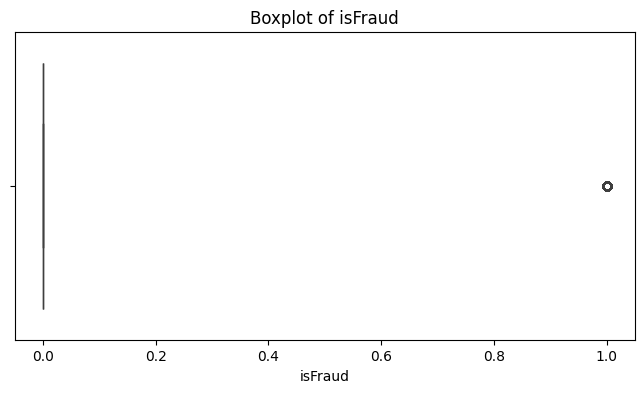

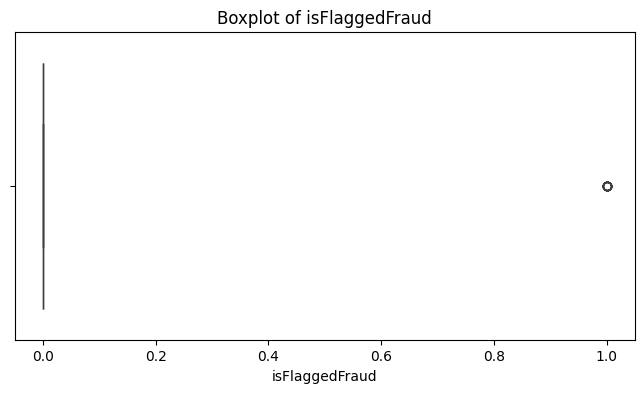

In [13]:
# Using the  boxplot to identify outliers for numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [14]:
# Capping extreme values
for col in numerical_cols:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=q1, upper=q99)


In [16]:
# Drop columns with too many unique values or those that are not useful for modeling
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Convert the 'type' column into dummy/indicator variables (this has fewer unique values)
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Verify the changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   type_CASH_OUT   bool   
 9   type_DEBIT      bool   
 10  type_PAYMENT    bool   
 11  type_TRANSFER   bool   
dtypes: bool(4), float64(5), int64(3)
memory usage: 412.6 MB
None


In [18]:
# Checking  the current columns in the DataFrame
print("Current columns in the DataFrame:")
print(df.columns)

# Assuming 'type' exists and if you're processing all categorical columns, 
# you can use LabelEncoder for categorical columns.
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encoding categorical columns with LabelEncoder
for col in categorical_cols:
    if col in df.columns:  # Check if the column exists
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Verify the changes
print("DataFrame after encoding:")
print(df.head())


Current columns in the DataFrame:
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
DataFrame after encoding:
   step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     9   9839.6400       170136.0       160296.36             0.0   
1     9   1864.2800        21249.0        19384.72             0.0   
2     9    449.4676          181.0            0.00             0.0   
3     9    449.4676          181.0            0.00         21182.0   
4     9  11668.1400        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0             0.0        0               0          False       False   
1             0.0        0               0          False       False   
2             0.0        0               0          False       False   
3

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target variable
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)  # Features
y = df['isFraud']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272524

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
#First, let's visualize the correlations between variables using a heatmap. This helps identify relationships between features and the target variable.

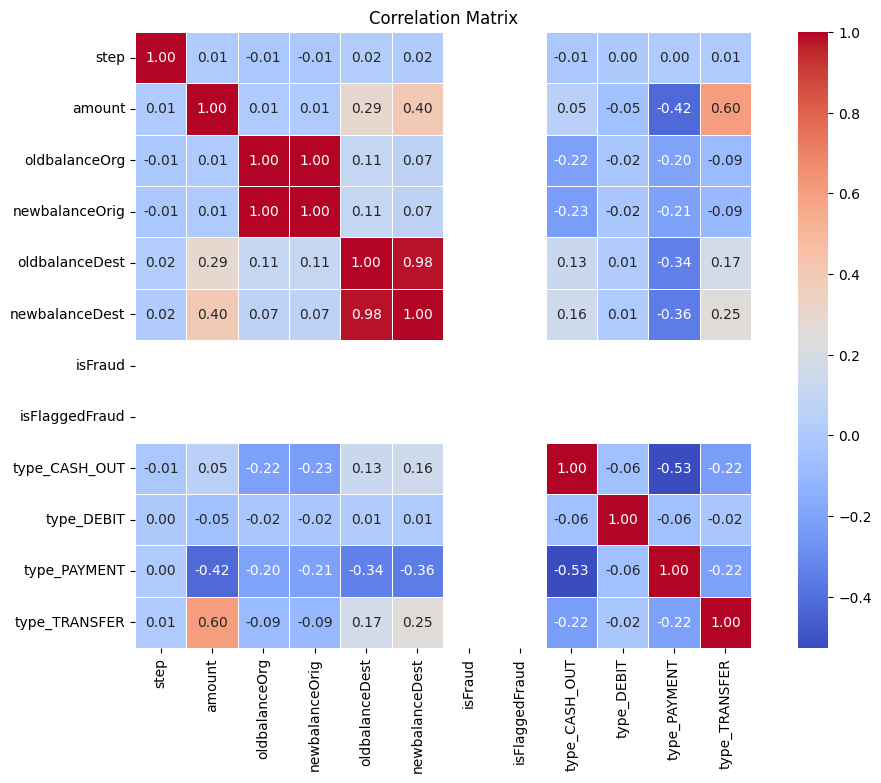

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with annotations
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

# Title and show the plot
plt.title('Correlation Matrix')
plt.show()


In [21]:
#Distribution of Target Variable

C:\Users\SHAMEER.K\AppData\Local\Temp\ipykernel_21692\2693810777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='isFraud', palette='pastel')


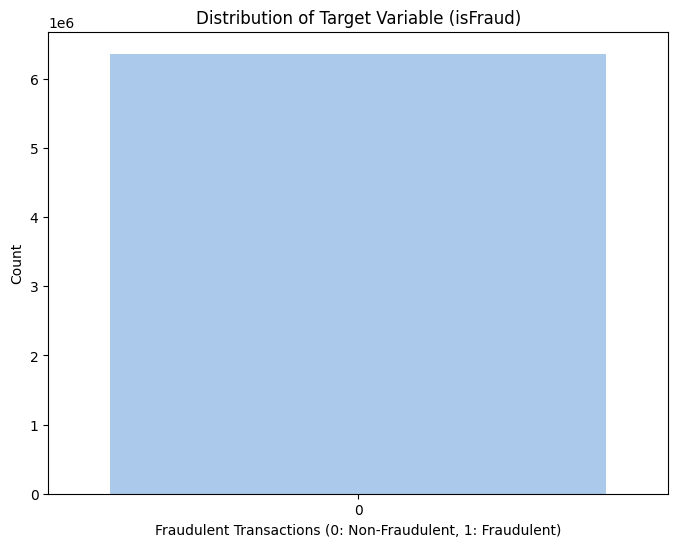

In [22]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='isFraud', palette='pastel')

# Title and labels
plt.title('Distribution of Target Variable (isFraud)')
plt.xlabel('Fraudulent Transactions (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


C:\Users\SHAMEER.K\AppData\Local\Temp\ipykernel_21692\2398751935.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=feature, data=df, palette='Set2')
C:\Users\SHAMEER.K\AppData\Local\Temp\ipykernel_21692\2398751935.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=feature, data=df, palette='Set2')
C:\Users\SHAMEER.K\AppData\Local\Temp\ipykernel_21692\2398751935.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=feature, data=df, palette='Set2')


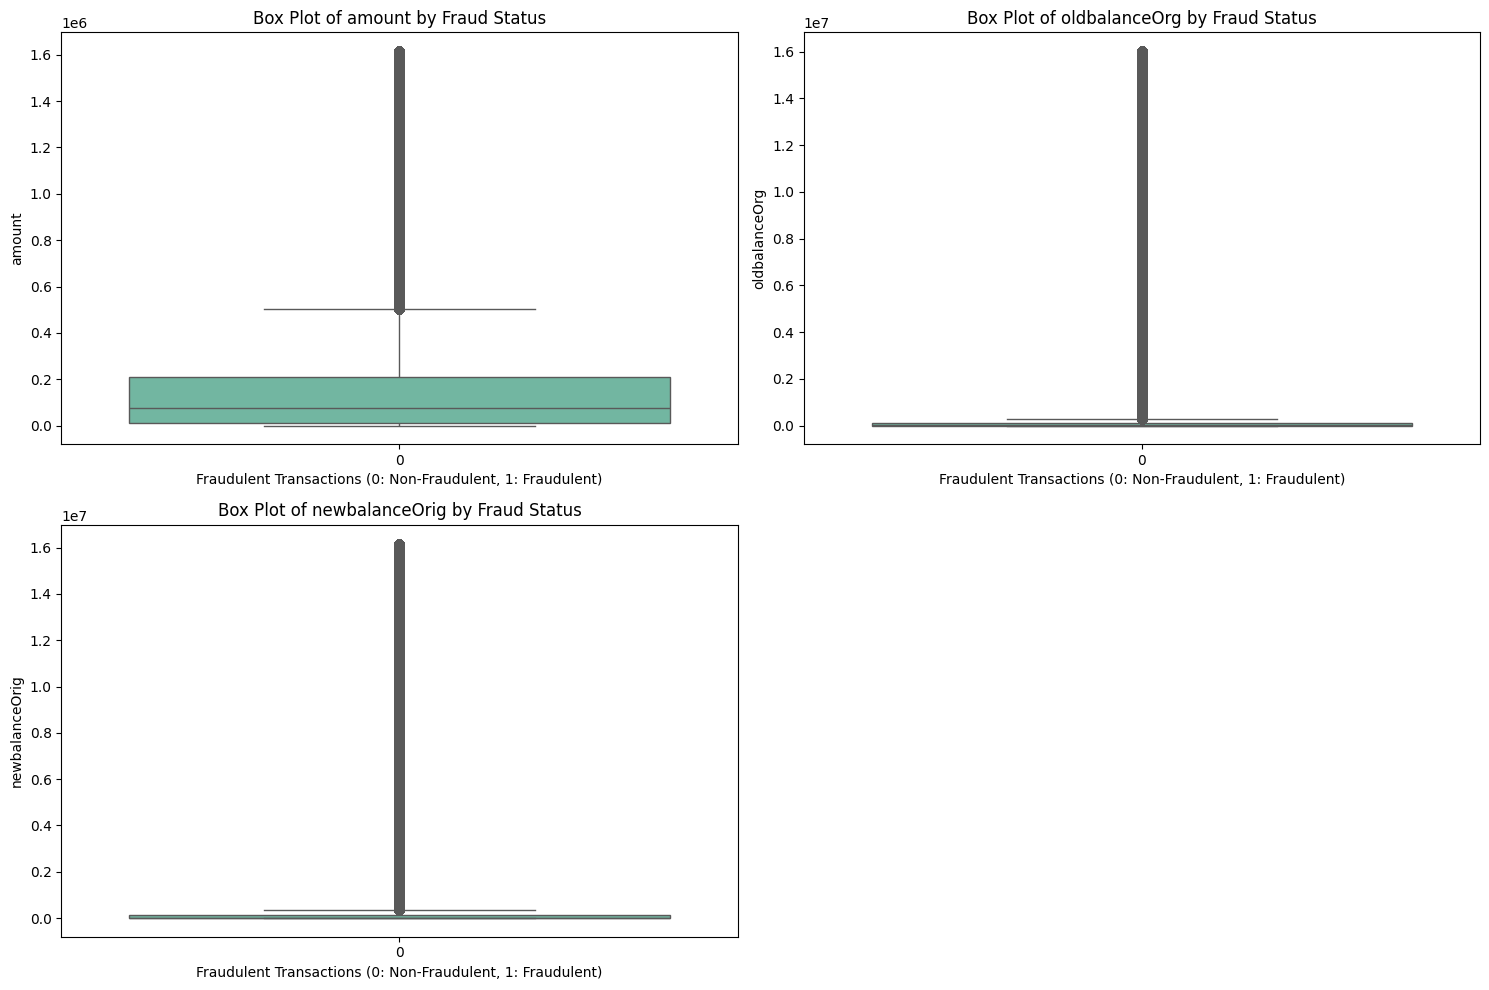

In [23]:
# List of features to visualize
features_to_visualize = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create box plots for each feature
for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='isFraud', y=feature, data=df, palette='Set2')
    plt.title(f'Box Plot of {feature} by Fraud Status')
    plt.xlabel('Fraudulent Transactions (0: Non-Fraudulent, 1: Fraudulent)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [24]:
##Create New Features

In [25]:
##Create Time-Based Features

In [27]:
print(df.columns)


Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [28]:
# Assuming each step represents one hour
df['hour_of_day'] = df['step'] % 24  # Hours from 0 to 23
df['day_of_week'] = (df['step'] // 24) % 7  # Days from 0 to 6 (for 7 days in a week)


In [29]:
df['transaction_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # Adding 1 to avoid division by zero


In [30]:
df['is_high_value_transaction'] = df['amount'].apply(lambda x: 1 if x > 10000 else 0)  # Example threshold


In [31]:
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define features and target variable
X = df.drop('isFraud', axis=1)  # Features
y = df['isFraud']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})

# Sort and display the top 10 important features
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)
print(top_features)


                      Feature  Importance
0                        step         0.0
9                type_PAYMENT         0.0
15        balance_change_orig         0.0
14  is_high_value_transaction         0.0
13          transaction_ratio         0.0
12                day_of_week         0.0
11                hour_of_day         0.0
10              type_TRANSFER         0.0
8                  type_DEBIT         0.0
1                      amount         0.0


In [33]:
## Data preparation for model

In [37]:
print(df['isFraud'].value_counts())


isFraud
0    6362620
Name: count, dtype: int64


In [42]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Example DataFrame X_train with NaN values
# X_train = pd.DataFrame(...)

# Identify numerical and categorical columns
numerical_cols = ['transaction_ratio', 'balance_change_orig', 'balance_change_dest']
categorical_cols = ['hour_of_day', 'day_of_week', 'is_high_value_transaction']

# Create imputers for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='mean')  # For numerical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Impute numerical columns
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])

# Impute categorical columns
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])

# Now you can check again for missing values to confirm they have been handled
missing_values_after_imputation = X_train.isnull().sum()
print(missing_values_after_imputation[missing_values_after_imputation > 0])


Series([], dtype: int64)


In [44]:
from imblearn.over_sampling import SMOTE

# Adjust k_neighbors to be less than or equal to the number of samples in the minority class
sm = SMOTE(random_state=42, k_neighbors=2)  # or any value <= 3
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [45]:
print("Class distribution before SMOTE:")
print(y_train.value_counts())


Class distribution before SMOTE:
isFraud
0    5090095
1          3
Name: count, dtype: int64


In [46]:
from imblearn.over_sampling import RandomOverSampler

# Creating  an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply the random oversampling
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_train_res).value_counts())


Class distribution after Random Oversampling:
isFraud
0    5090095
1    5090095
Name: count, dtype: int64


In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Encode the 'type' column
X_train['type'] = label_encoder.fit_transform(X_train['type'])
X_val['type'] = label_encoder.transform(X_val['type'])


In [59]:
# One-hot encoding
X_train = pd.get_dummies(X_train, columns=['type'], drop_first=True)
X_val = pd.get_dummies(X_val, columns=['type'], drop_first=True)

# Align the columns of the training and validation sets
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)


In [60]:
print(X_train.dtypes)
print(X_val.dtypes)


step                int64
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int32
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
type_1               bool
type_2               bool
type_3               bool
type_4               bool
dtype: object
step                int64
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int32
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
type_1               bool
type_2               bool
type_3               bool
type_4               bool
dtype: object


In [64]:
import pandas as pd

# Load the dataset
df = pd.read_csv('datascience/Fraud.csv')

# Check the column names
print("Column names in the dataset:")
print(df.columns)


Column names in the dataset:
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [71]:
#####################

In [72]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# For handling missing data and imputation
from sklearn.impute import SimpleImputer


In [73]:
# Load the dataset
df = pd.read_csv('datascience/Fraud.csv')

# Check the first few rows of the dataset
df.head()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Create transformers for numeric and non-numeric data
numeric_transformer = SimpleImputer(strategy='mean')
non_numeric_transformer = SimpleImputer(strategy='most_frequent')

# Apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', non_numeric_transformer, non_numeric_cols)
    ]
)

# Transform the data
df_imputed = pd.DataFrame(preprocessor.fit_transform(df), columns=numeric_cols.tolist() + non_numeric_cols.tolist())

# Check if there are any remaining missing values
df_imputed.isnull().sum()


step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type              0
nameOrig          0
nameDest          0
dtype: int64

In [77]:
# Detect and remove outliers using IQR for numerical features
Q1 = df_imputed[numeric_cols].quantile(0.25)
Q3 = df_imputed[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Removing rows with outliers
df_cleaned = df_imputed[~((df_imputed[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_imputed[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [78]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'type' feature
le = LabelEncoder()
df_cleaned['type'] = le.fit_transform(df_cleaned['type'])

# Drop columns that are not useful for the prediction, such as 'nameOrig' and 'nameDest'
df_cleaned = df_cleaned.drop(['nameOrig', 'nameDest'], axis=1)


C:\Users\SHAMEER.K\AppData\Local\Temp\ipykernel_21692\3140142238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = le.fit_transform(df_cleaned['type'])


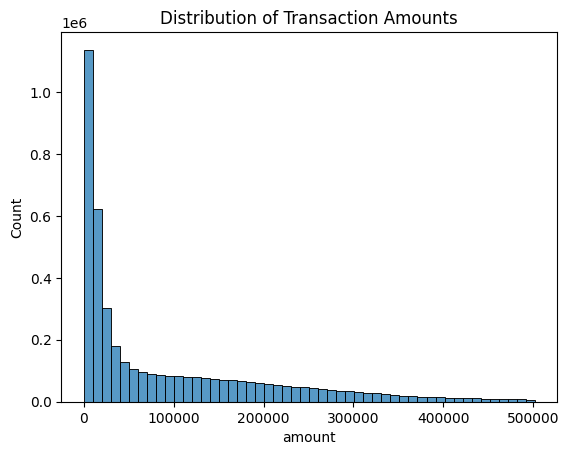

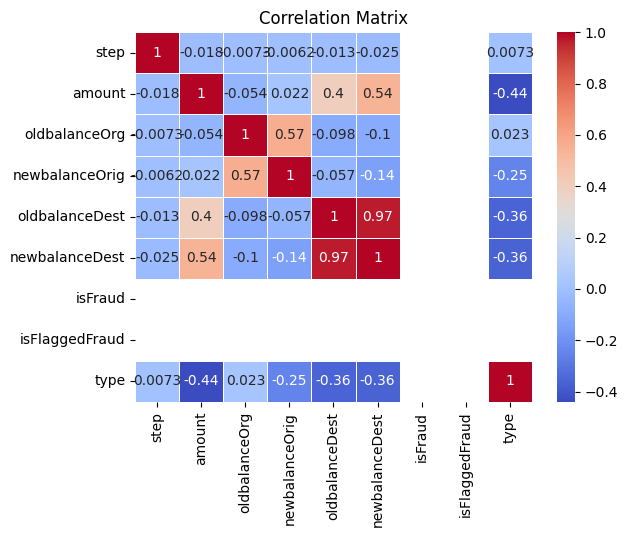

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check distribution of 'amount'
sns.histplot(df_cleaned['amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.show()

# Correlation heatmap
corr = df_cleaned.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [80]:
# Create new features
df_cleaned['balanceDifference'] = df_cleaned['oldbalanceOrg'] - df_cleaned['newbalanceOrig']
df_cleaned['transactionRatio'] = df_cleaned['oldbalanceDest'] / (df_cleaned['newbalanceDest'] + 1)  # Avoid division by zero


In [86]:
print(df_cleaned['isFraud'].value_counts())


isFraud
0.0    4319406
Name: count, dtype: int64


In [87]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your current dataframe without fraud cases
num_fraud_samples = 100  # Number of synthetic fraud samples

# Generating synthetic fraud data
synthetic_fraud = pd.DataFrame({
    'amount': np.random.uniform(low=1000, high=5000, size=num_fraud_samples),
    'oldbalanceOrg': np.random.uniform(low=1000, high=50000, size=num_fraud_samples),
    'newbalanceOrig': np.random.uniform(low=0, high=50000, size=num_fraud_samples),
    'oldbalanceDest': np.random.uniform(low=1000, high=50000, size=num_fraud_samples),
    'newbalanceDest': np.random.uniform(low=0, high=50000, size=num_fraud_samples),
    'type': np.random.choice(['CASH_OUT', 'PAYMENT', 'TRANSFER', 'DEPOSIT'], size=num_fraud_samples),
    'nameOrig': ['C' + str(i) for i in range(num_fraud_samples)],
    'nameDest': ['C' + str(i + 1) for i in range(num_fraud_samples)],
    'isFraud': 1  # Mark all as fraud
})

# Append the synthetic data to the original dataset
df_cleaned = pd.concat([df_cleaned, synthetic_fraud], ignore_index=True)

# Check the updated distribution
print(df_cleaned['isFraud'].value_counts())


isFraud
0.0    4319406
1          100
Name: count, dtype: int64


Missing values in each column:
step                     100
amount                     0
oldbalanceOrg              0
newbalanceOrig             0
oldbalanceDest             0
newbalanceDest             0
isFraud                    0
isFlaggedFraud           100
type                       0
balanceDifference        100
transactionRatio         100
nameOrig             4319406
nameDest             4319406
dtype: int64
Data types of the columns:
step                 object
amount               object
oldbalanceOrg        object
newbalanceOrig       object
oldbalanceDest       object
newbalanceDest       object
isFraud              object
isFlaggedFraud       object
type                  int32
balanceDifference    object
transactionRatio     object
nameOrig             object
nameDest             object
dtype: object
Categorical columns: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balanceDifference', 'transactionR

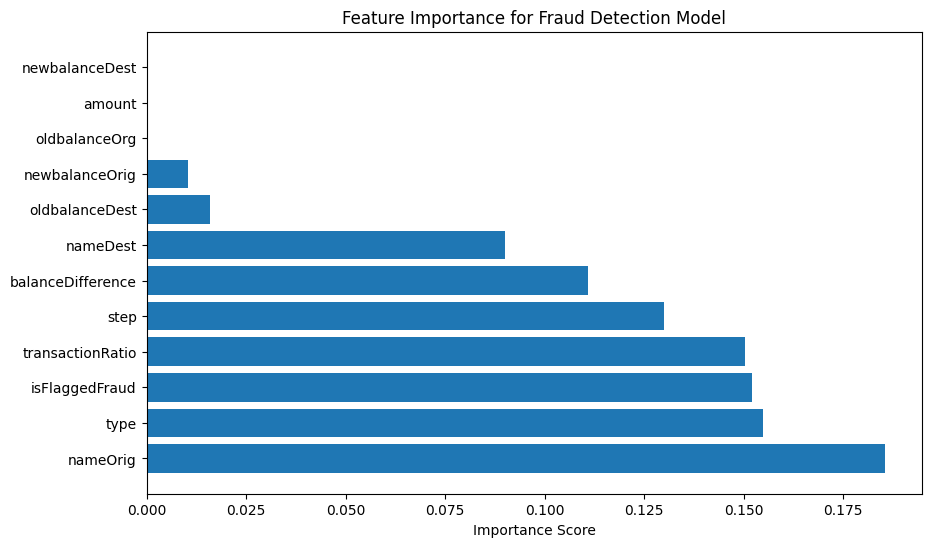

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# df_cleaned = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line to load your dataset

# Data Cleaning
# Check for missing values
print("Missing values in each column:")
print(df_cleaned.isnull().sum())

# Fill or drop missing values as needed
# Example: df_cleaned.fillna(0, inplace=True)  # Replace NaNs with 0

# Check data types of the columns
print("Data types of the columns:")
print(df_cleaned.dtypes)

# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Encode categorical variables
for col in categorical_columns:
    # Convert all values to string (optional, just in case)
    df_cleaned[col] = df_cleaned[col].astype(str)
    
    # Use Label Encoding for each categorical column
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Verify that 'isFraud' has instances of fraud
print("Distribution of isFraud:")
print(df_cleaned['isFraud'].value_counts())

# Drop any non-numeric columns if they still exist (not likely after encoding)
# X = df_cleaned.drop('isFraud', axis=1).select_dtypes(include=[np.number])
# Alternatively, just drop 'isFraud' as it is the target variable
X = df_cleaned.drop('isFraud', axis=1)
y = df_cleaned['isFraud']

# Ensure all features are numeric
print("Data types after encoding:")
print(X.dtypes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest model with class weights
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Feature Importance
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance for Fraud Detection Model')
plt.show()


In [91]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 1.0000


In [92]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1295822
           1       1.00      1.00      1.00        30

    accuracy                           1.00   1295852
   macro avg       1.00      1.00      1.00   1295852
weighted avg       1.00      1.00      1.00   1295852

